## Realized Volatility

Also refered to as historical or statistical volatility, realized volatility estimates the volatility of the underlying price over a defined period of time. It's generally used as an input into a pricing model such as the Black- Scholes model to calibrate the value to then solve for implied volatiltiy. Realized volatility is not generally used for making trading decisions but can be informative in understanding how the underlying has moved in the past.

### Import Libraries

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

### Import Data

In [4]:
# Define a stock symbol
underlying_symbol = "IBM"
# Define the date range
start_date = "2015-01-01"
end_date = "2015-12-31"

# Fetch the data using yfinance
prices = yf.download(underlying_symbol, start=start_date, end=end_date)

# Yahoo returns prices in ascending order, sort to descending order
prices.sort_index(ascending=False, inplace=True)

# Let's pickle the dataframe so we don't have to hit the network every time
prices.to_pickle("underlying_prices.pickle")

[*********************100%%**********************]  1 of 1 completed


In [5]:
# read the original frame in from cache (pickle)
prices = pd.read_pickle("underlying_prices.pickle")

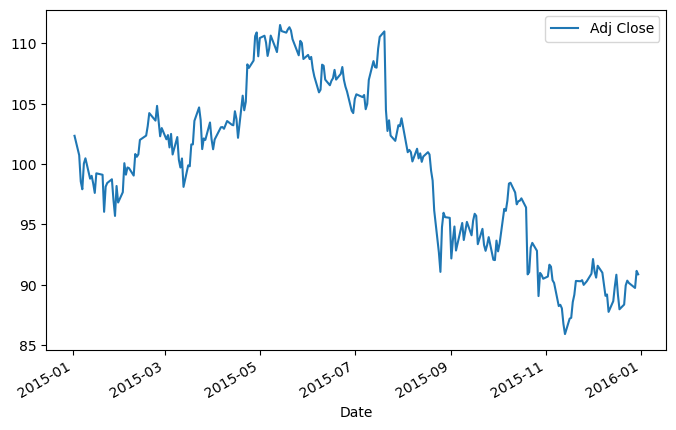

In [7]:
prices["Adj Close"].plot(figsize=(8, 5))
plt.legend()

### Compute Volatility

In [9]:
# compute the log returns from the adjusted closing price
log_return = (prices["Adj Close"] / prices["Adj Close"].shift(-1)).apply(np.log) # take the standard deviation of the last month of data (22 trading days)
sd_of_log_returns = log_return.head(22).std()
# multiply by the square root of the number of trading days in a year (252) to annualize
realized_volatility = sd_of_log_returns * np.sqrt(252)

In [10]:
print("One month, annualized realized volatility %0.4f" % realized_volatility)

One month, annualized realized volatility 0.1764


In [12]:
# use the pandas DataFrame.rolling method to create a rolling standard deviation of
# log returns, then multiply by square root of 252 to annualize 
rolling_realized_volatility = log_return.rolling(window=22, center=False).std() * np.sqrt(252)

<Axes: title={'center': 'Historic one month, annualized realized volatility'}, xlabel='Date'>

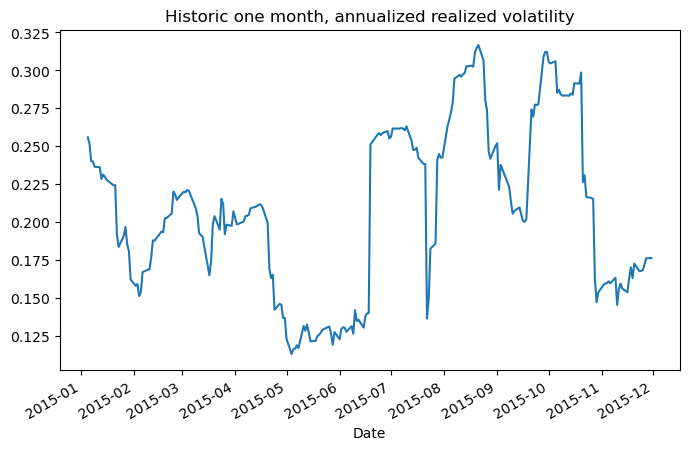

In [15]:
# note that we plot plot directly from a pandas data frame!
rolling_realized_volatility.plot(title="Historic one month, annualized realized volatility", figsize=(8, 5))